# 3.3 Modelo de Regresión no Lineal

### Miguel Ángel Jiménez Cuadrillero
### 2020

En algunos casos existen verdaderas relaciones entre la variable predictora y la salida, y ésta relación no es lineal.

Existen varios métodos:
* Polynomial regression: añadir términos polinómicos y/o cuadráticos, cúbicos…
* Spline regression: ajustar una curva con segmentos polinómicos llamados Knots
* Generalized Additive Models (GAM): selección automática de Knots.

La bondad de estos modelos se evalúa también con RMSE y R2

*OBJETIVO*: Queremos predecir el Median House Value (mdev) en los suburbios de Boston en función de la variable lstat (porcentaje de población de menor status)

Descripción de las variables:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000 dollars
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    percentage lower status of the population
14. MEDV     Median value of owner-occupied homes in 1000's dollars

## Carga de Datos

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
from sklearn.model_selection import train_test_split
plt.figure(figsize=(20,5))

random_state = 123

<Figure size 1440x360 with 0 Axes>

## Análisis Exploratorio de Datos

In [2]:
df = pd.read_csv("./datasets/Boston.csv", sep=',')

In [3]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


## Estudio numérico de datos

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visualización de Datos

Representamos scatterplots de las variables dos a dos. En la diagonal tenemos el histograma de la variable en cuestión.

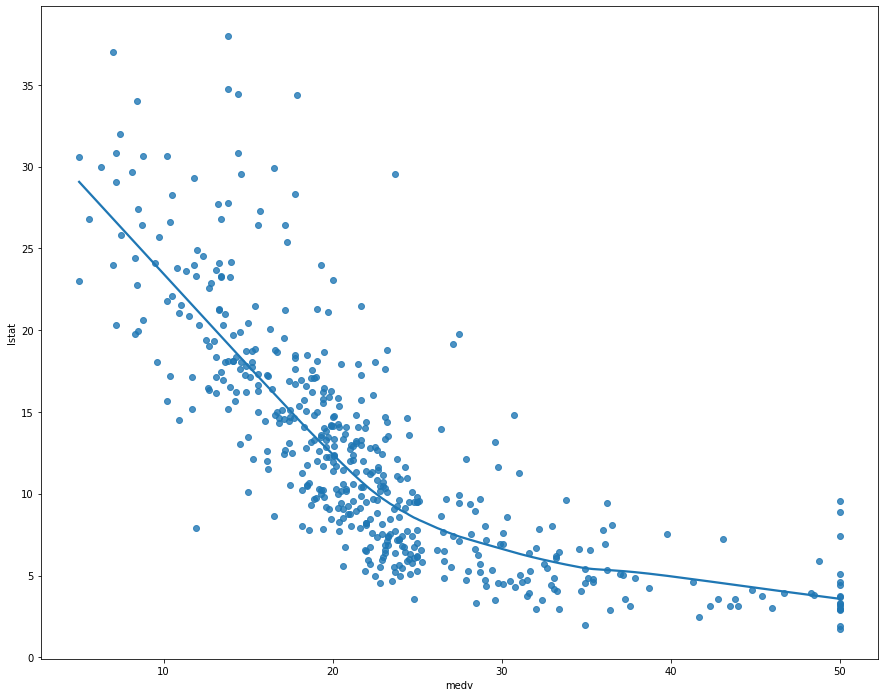

In [7]:
plt.figure(figsize=(15,12))
g = sns.regplot(x="medv", y="lstat", lowess=True, data=df)

## Interpretación preliminar


El gráfico anterior sugiere una relación no lineal entre las dos variables.

## Entrenamiento del Modelo



## Selección de Features y Label

Vamos a formular el modelo como un polinomio de grado dos:

medv = b0 + b1lstat + b2lstat^2

NOTA: en scikit-learn es necesario utilizar PolynomialFeatures como una etapa del pipeline de cálculo del modelo.


## División Train/Test


In [39]:
df = pd.read_csv("./datasets/Boston.csv", sep=',')

y = df['lstat'].values
X = df['medv'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=random_state)

## Configuración del Modelo

Los predictores de entrada en este caso no se establecen como una formula si no que asume que son todas las columnas que se le pase al método fit.

In [57]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


def train_polynomial_model_with_degree(degree):
    polynomial_features= PolynomialFeatures(degree=degree)

    X_polynomial = polynomial_features.fit_transform(X)

    lm = linear_model.LinearRegression()
    lm.fit(X_polynomial, y)

    y_polynomial_pred = lm.predict(X_polynomial)


    RMSE = mean_squared_error(y, y_polynomial_pred, squared=True)
    print(RMSE)

    R2 = r2_score(y,y_polynomial_pred)
    print(R2)
    sns.lmplot(x="medv", y="lstat", data=df, order=degree, height=5, aspect=1.25)

23.200208918044186
0.5441462975864798


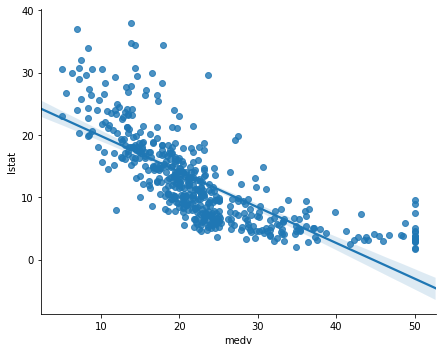

In [59]:
train_polynomial_model_with_degree(1)

16.343976421544028
0.6788622813596539


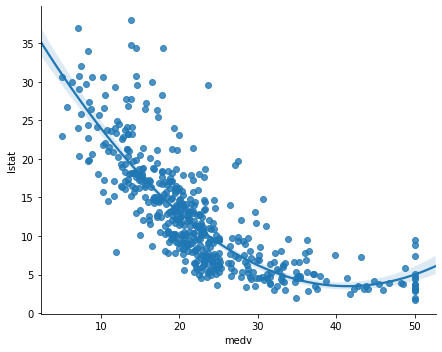

In [60]:
train_polynomial_model_with_degree(2)

16.336109901492026
0.6790168481699564


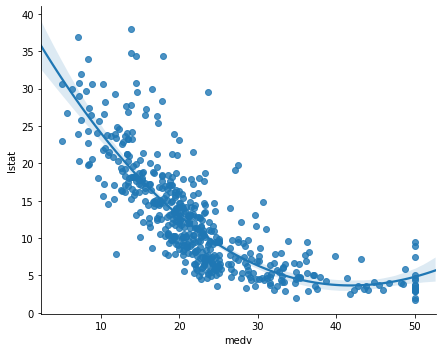

In [61]:
train_polynomial_model_with_degree(3)

16.05278189576715
0.6845838721938942


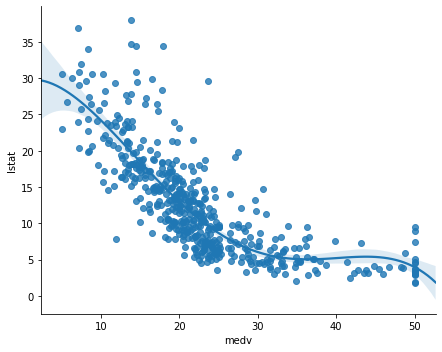

In [62]:
train_polynomial_model_with_degree(4)

15.973337808778158
0.6861448443953395


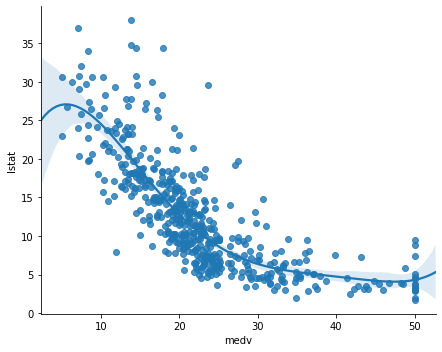

In [63]:
train_polynomial_model_with_degree(5)

15.917142054185097
0.6872490173310946


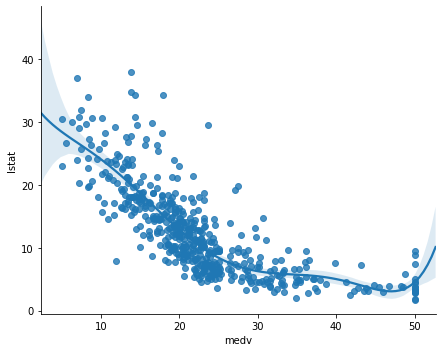

In [64]:
train_polynomial_model_with_degree(6)